<a href="https://colab.research.google.com/github/ijul17/homework/blob/main/Yulia%20Urazova/Nordal_P_161_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **ЗАГРУЖАЕМ ДАННЫЕ**

**ЗАГРУЖАЕМ БИБЛИОТЕКИ**

In [1]:
import zipfile
import requests
from io import BytesIO
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import pandas as pd

**ПОДГРУЖАЕМ И РАЗАРХИВИРУЕМ ФАЙЛ**

In [ ]:
url = 'https://storage.yandexcloud.net/mystudy2024/data_file_nordal.zip'
response = requests.get(url)
zip_content = BytesIO(response.content)
with zipfile.ZipFile(zip_content, 'r') as zip_ref:
    zip_ref.extractall('data_file_nordal')
del zip_content
gc.collect()
csv_file_path = 'data_file_nordal/data_file_nordal.csv'

**ДЕЛИМ ФАЙЛ НА 87 ЧАСТЕЙ ПО 100 т ЗНАЧЕНИЙ**

In [ ]:
def split_csv(file_path, lines_per_file):
    """Разделяет CSV файл на несколько файлов с указанным количеством строк."""
    with open(file_path, 'r', encoding='utf-8') as file:
        header = file.readline()
        file_count = 1
        while True:
            # Создаем новый файл для каждой части
            split_file_name = f'data_file_nordal/data_file_nordal_part_{file_count}.csv'
            with open(split_file_name, 'w', encoding='utf-8') as split_file:
                split_file.write(header)  # Записываем заголовок в каждый новый файл
                for _ in range(lines_per_file):
                    line = file.readline()
                    if not line:
                        return  # Если достигнут конец файла, выходим
                    split_file.write(line)
                file_count += 1
lines_per_file=100000
split_csv(csv_file_path, lines_per_file)

##### **УДАЛИМ ВСЕ КРОМЕ ОСНОВНОГО ФАЙЛА (для разных разбивок)**

In [ ]:
import os

# Директория, которую нужно очистить
directory = 'data_file_nordal'

# Имя файла, который нужно сохранить
file_to_keep = 'data_file_nordal.csv'

for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    # Проверяем, является ли путь файлом или директорией
    if os.path.isfile(file_path) or os.path.isdir(file_path):
        # Удаляем, если это не файл, который мы хотим сохранить
        if filename != file_to_keep:
            if os.path.isfile(file_path):
                os.remove(file_path)  # Удаляем файл
            else:
                os.rmdir(file_path)  # Удаляем директорию (работает только если директория пуста)
            print(f"Удален: {file_path}")


Удален: data_file_nordal/data_file_nordal_part_1707.csv
Удален: data_file_nordal/data_file_nordal_part_619.csv
Удален: data_file_nordal/data_file_nordal_part_1672.csv
Удален: data_file_nordal/data_file_nordal_part_1419.csv
Удален: data_file_nordal/data_file_nordal_part_112.csv
Удален: data_file_nordal/data_file_nordal_part_211.csv
Удален: data_file_nordal/data_file_nordal_part_340.csv
Удален: data_file_nordal/data_file_nordal_part_1405.csv
Удален: data_file_nordal/data_file_nordal_part_643.csv
Удален: data_file_nordal/data_file_nordal_part_1588.csv
Удален: data_file_nordal/data_file_nordal_part_399.csv
Удален: data_file_nordal/data_file_nordal_part_1176.csv
Удален: data_file_nordal/data_file_nordal_part_261.csv
Удален: data_file_nordal/data_file_nordal_part_183.csv
Удален: data_file_nordal/data_file_nordal_part_376.csv
Удален: data_file_nordal/data_file_nordal_part_1028.csv
Удален: data_file_nordal/data_file_nordal_part_949.csv
Удален: data_file_nordal/data_file_nordal_part_1050.csv
Уд

#### **АНАЛИЗ ОДНОГО ФАЙЛА**

**CAT-1** - объект (спуткник-1 площадной объект на котором располагается оборудование)

**IMX.IMX005** - девайс откуда считывается

**P161/1** - насос

**P-161/1_PT_251** - тэг датчика

In [31]:
file_path = '/content/data_file_nordal/data_file_nordal_part_1.csv'
df = pd.read_csv(file_path, header=None, names=['Device', 'Time', 'Value'])


df.head(100)

FileNotFoundError: [Errno 2] No such file or directory: '/content/data_file_nordal/data_file_nordal_part_1.csv'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
file_path_P2a = '/content/drive/MyDrive/Colab Notebooks/Юля учеба/Nordall/P-2A.csv'
#file_path_P2b = '/content/drive/MyDrive/Colab Notebooks/Юля учеба/Nordall/P-2B.csv'



In [76]:
df_P2a = pd.read_csv(file_path_P2a)
df=df_P2a

#df_P2b = pd.read_csv(file_path_P2b)
#df=pd.concat(['P2A_I_frq',	'P2A_Q_frq',	'P2A_I_frq_std',	'PIT_P2A_std',	'PT-111_P-2A_std',	'TT-111_P-2A_std',	'VT-111_P-2A_std',	'VT-112_P-2A_std',	'VT-113_P-2A_std',	'VTVT-121_P-2B_std',	'VT-113_P-P-2A_std'], ignore_index=False)
df.drop(['P2A_I_frq',	'P2A_Q_frq',	'P2A_I_frq_std',	'PIT_P2A_std',	'PT-111_P-2A_std',	'TT-111_P-2A_std',	'VT-111_P-2A_std',	'VT-112_P-2A_std',	'VT-113_P-2A_std',	'VTVT-121_P-2B_std',	'VT-113_P-P-2A_std', 'P2A_Q_frq_std',	'VTVT-121_P-2B',	'VT-113_P-P-2A'], axis= 1 , inplace= True)
df.fillna(method='ffill', inplace=True) #заменим все NaN на предыдущие значения


In [77]:
df["time"] = pd.to_datetime(df["time"])
df.set_index('time', inplace = True)
#df.drop('time',axis=1,inplace=True)
df

,PIT_P2A,PT-111_P-2A,TT-111_P-2A,VT-111_P-2A,VT-112_P-2A,VT-113_P-2A
time,,,,,,
2023-08-27 18:05:00,1.648983,3.722250,27.395230,2.144998,4.591376,9.567699
2023-08-27 18:06:00,1.648923,3.729861,27.381772,2.139853,4.577248,9.752089
2023-08-27 18:07:00,1.649897,3.730316,27.356091,2.152397,4.570641,9.740019
2023-08-27 18:08:00,1.649594,3.725451,27.336631,2.158277,4.578770,9.773133
2023-08-27 18:09:00,1.649357,3.727881,27.330388,2.156730,4.584868,9.763785
...,...,...,...,...,...,...
2023-12-31 23:55:00,1.465614,1.960924,13.656949,0.117071,0.103017,0.465263
2023-12-31 23:56:00,1.465093,1.965749,13.661426,0.125162,0.111702,0.467404
2023-12-31 23:57:00,1.464754,1.966863,13.665701,0.113649,0.113353,0.536485


In [78]:
df.index[:5]

DatetimeIndex(['2023-08-27 18:05:00', '2023-08-27 18:06:00',
               '2023-08-27 18:07:00', '2023-08-27 18:08:00',
               '2023-08-27 18:09:00'],
              dtype='datetime64[ns]', name='time', freq=None)

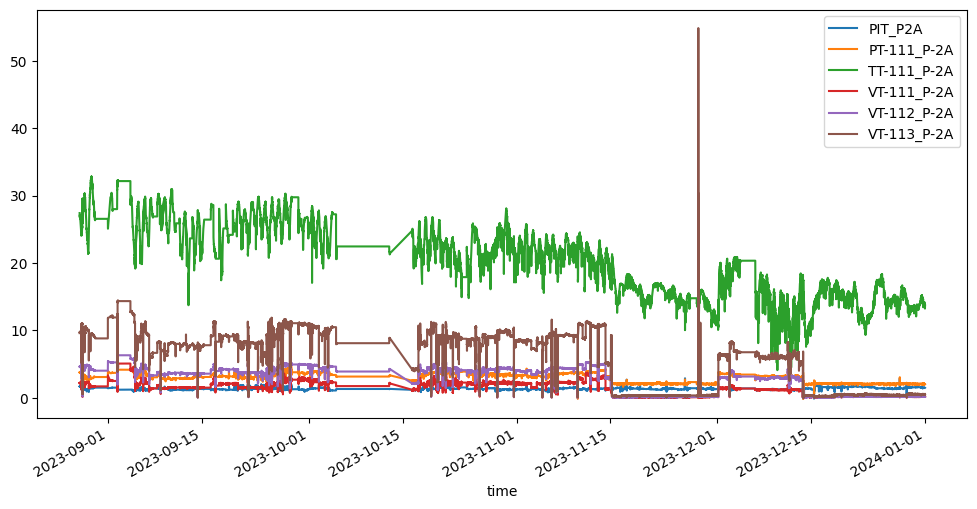

In [79]:
import matplotlib.pyplot as plt
#df.plot(x='time', y=["PIT_P2A", "PT-111_P-2A", "TT-111_P-2A", "VT-111_P-2A", "VT-112_P-2A", "VT-113_P-2A"])
df.plot(figsize = (12,6))
plt.show()

In [45]:
# импортируем функцию seasonal_decompose из statsmodels
#from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
#from pylab import rcParams
#rcParams['figure.figsize'] = 11, 9

# применяем функцию к данным
#decompose = seasonal_decompose(df)
#decompose.plot()

#plt.show()

Значения для датчика: P2a TT 60. max65, PT 3.1. max 3.58, VT <2.8 normal, 2.8-7.1 high, >7.1 abnormal

In [80]:
def for_P2aTT(row):
  '''функция для определения критичных значенй для датчика ТЕМПЕРАТУРЫ.
  Присвоение степени "Высокая" происходит при пороге -3% от максимального
  При значении больше максимального - степень "Критическая"'''
  max_t=65
  if row['TT-111_P-2A'] <=0.97*max_t:
        return 0
  elif row['TT-111_P-2A'] >0.97*max_t<max_t:
        return 1
  else:
        return 2

In [81]:
df['cat_for_P2aTT'] = df.apply(for_P2aTT, axis=1)

In [82]:
df['cat_for_P2aTT'].value_counts()

cat_for_P2aTT
0    176513
Name: count, dtype: int64

In [83]:
def for_P2aPT(row):
    '''функция для определения критичных значенй для датчика ДАВЛЕНИЯ.
  Присвоение степени "Высокая" происходит при пороге -3% от максимального
  При значении больше максимального - степень "Критическая"'''
    max_pt=3.58
    if row['PT-111_P-2A'] <=0.97*max_pt:
        return 0 #normal
    elif 0.97*max_pt<row['PT-111_P-2A'] <max_pt:
        return 1 #high
    else:
        return 2 #critical

In [84]:
df['cat_for_P2aPT'] = df.apply(for_P2aPT, axis=1)
df['cat_for_P2aPT'].value_counts()

cat_for_P2aPT
0    131154
2     33150
1     12209
Name: count, dtype: int64

In [85]:
#найдем минимальное, среднее и максимальное значение для показаний виброускорения
for_vt11_min=df['VT-111_P-2A'].min()
for_vt11_max=df['VT-111_P-2A'].max()
for_vt11_mean=df['VT-111_P-2A'].mean()
print(for_vt11_min, for_vt11_max, for_vt11_mean)

0.0067534646523809 5.2475057021666665 1.448468283872779


In [86]:
for_vt11_min=df['VT-113_P-2A'].min()
for_vt11_max=df['VT-113_P-2A'].max()
for_vt11_mean=df['VT-113_P-2A'].mean()
print(for_vt11_min, for_vt11_max, for_vt11_mean)

0.0119836932333333 54.85585001430666 6.311314555519245


In [61]:
def for_P2aVT(row):
    '''функция для определения критичных значенй для датчика ВИБРАЦИИ - виброускорение.
  Присвоение степени "Высокая" происходит при пороге 2.8-7.1
  При значении больше 7.1  - степень "Критическая"'''
    predmax_vt=0.97*(for_vt11_mean+for_vt11_max)
    #max_vt=7.1
    if row['VT-111_P-2A', 'VT-112_P-2A', 'VT-113_P-2A'] <predmax_vt:
     #   return 'normal'
    #elif predmax_vt<=row['PT-111_P-2A'] <max_vt:
     #   return 'high'
    #else:
     #   return 'critical'

In [62]:
#df['for_P2aVT'] = df.apply(for_P2aVT, axis=1)
#df['for_P2aVT'].value_counts()

In [87]:
df.head()

,PIT_P2A,PT-111_P-2A,TT-111_P-2A,VT-111_P-2A,VT-112_P-2A,VT-113_P-2A,cat_for_P2aTT,cat_for_P2aPT
time,,,,,,,,
2023-08-27 18:05:00,1.648983,3.722250,27.395230,2.144998,4.591376,9.567699,0,2
2023-08-27 18:06:00,1.648923,3.729861,27.381772,2.139853,4.577248,9.752089,0,2
2023-08-27 18:07:00,1.649897,3.730316,27.356091,2.152397,4.570641,9.740019,0,2
2023-08-27 18:08:00,1.649594,3.725451,27.336631,2.158277,4.578770,9.773133,0,2
2023-08-27 18:09:00,1.649357,3.727881,27.330388,2.156730,4.584868,9.763785,0,2


In [89]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [90]:
#centers = [[1, 1], [-1, -1], [1, -1]]
X=df
X, labels_true = make_blobs(n_samples=750, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

Estimated number of clusters: 3
Estimated number of noise points: 2
Homogeneity: 0.998
Completeness: 0.984
V-measure: 0.991
Adjusted Rand Index: 0.996
Adjusted Mutual Information: 0.991
Silhouette Coefficient: 0.743


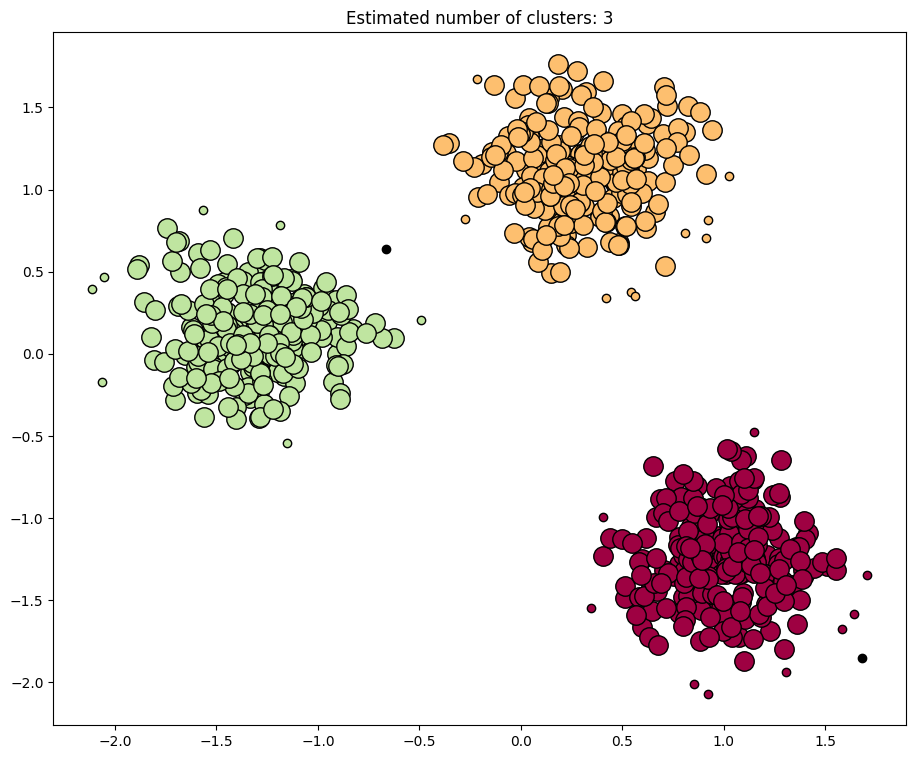

In [91]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [102]:
def claster(row):
    '''функция для определения класса после кластеризации'''
    for row in len(df):
     df['claster']=labels[row]


In [105]:
for row in range(5):
 print(labels[row])

0
1
0
0
2


In [103]:
df['claster'] = df.apply(claster, axis=1)
df['claster'].value_counts()

TypeError: 'int' object is not iterable

##hdbscan

In [ ]:
from sklearn.cluster import HDBSCAN

ImportError: cannot import name 'HDBSCAN' from 'sklearn.cluster' (/usr/local/lib/python3.10/dist-packages/sklearn/cluster/__init__.py)

In [ ]:
!pip install hdbscan


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, adjusted_rand_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 21.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039283 sha256=39d761c193fd519ead5ec51edb28ed98fa113fa1c7bb72051366519e9caf92a1
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [ ]:
import hdbscan

In [ ]:
# Initialize HDBSCAN with additional parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size=5,
                            min_samples=5,
                            cluster_selection_method='eom',
                            allow_single_cluster=True,
                            metric='euclidean',
                            algorithm='best',
                            leaf_size=30)

In [ ]:
# Fit the model to the data
clusterer.fit(X)

ValueError: Expected 2D array, got scalar array instead:
array=None.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Evaluate clustering
labels = clusterer.labels_
silhouette_avg = silhouette_score(X, labels)
ari = adjusted_rand_score(y_true, labels)

# Evaluation metrics
print("Silhouette Coefficient: {:.2f}".format(silhouette_avg))
print("Adjusted Rand Index: {:.2f}".format(ari))

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusterer.labels_,
            cmap='viridis', s=50, alpha=0.7, edgecolors='k')
plt.colorbar()
plt.title('HDBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

##KMeans и KNN модуль PyOD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
%matplotlib inline


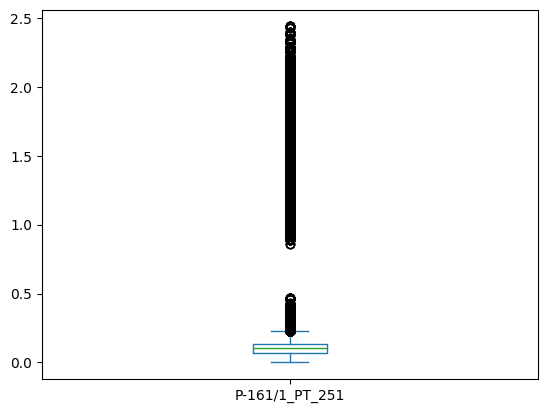

In [ ]:
df['P-161/1_PT_251'].plot(kind='box')
plt.show()

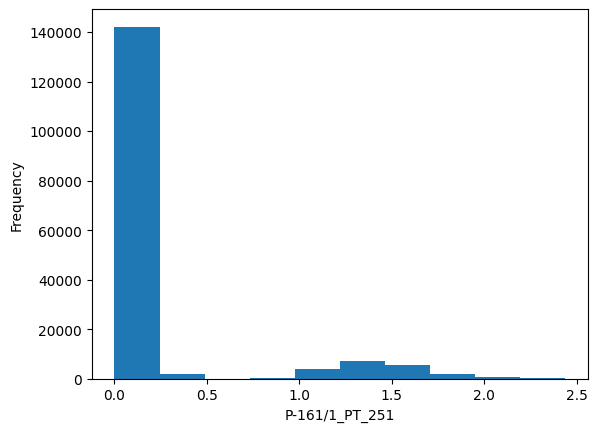

In [ ]:
ax=df['P-161/1_PT_251'].plot(kind='hist')
ax.set_xlabel('P-161/1_PT_251')
plt.show()

In [ ]:
print('max '+str(df['P-161/1_PT_251'].max()))
print('min '+str(df['P-161/1_PT_251'].min()))

max 2.43752146
min 0.0


In [ ]:
value_161_1_PT_251=df['P-161/1_PT_251'].values

In [ ]:
value_161_1_PT_251=value_161_1_PT_251.reshape(-1,1)
value_161_1_PT_251=value_161_1_PT_251.astype('float64')

In [ ]:
from scipy.cluster.vq import kmeans

In [ ]:
codebook, distortion = kmeans(value_161_1_PT_251, 2)

In [ ]:
from scipy.cluster.vq import vq

In [ ]:
groups, cdist = vq(value_161_1_PT_251, codebook)

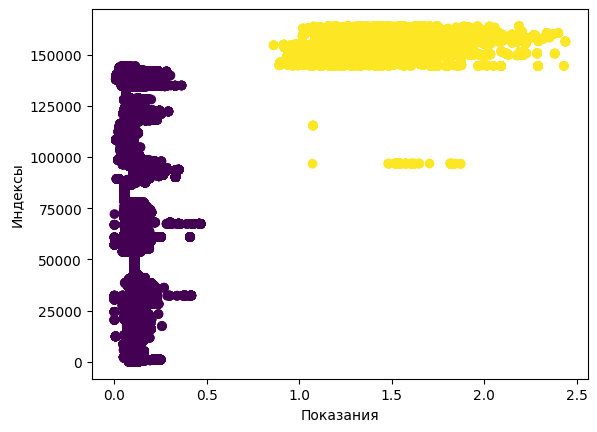

In [ ]:
plt.scatter(value_161_1_PT_251, np.arange(0, 164011), c=groups)
plt.xlabel('Показания')
plt.ylabel('Индексы')

plt.show()